# Precision-recall curve from scratch

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [11]:
# read in the data
X, y = make_classification(n_samples=200, scale=1.2)

In [12]:
# derive a train-test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [13]:
# fit a LogReg model on the train data
clf_plain = LogisticRegression(max_iter=1000)
clf_plain.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [14]:
# calculate probabilities
# the second column are the probability of positive class label
ytest_proba = clf_plain.predict_proba(Xtest)[:,1]

In [25]:
# define a sequence of threshold values
thresholds = np.linspace(0, 1, 1000)
precisions = []
recalls = []

for threshold in thresholds:
    # assign a positive label if probability is above threshold
    ypred = ytest_proba > threshold
    # calculate precision and recall
    precision = metrics.precision_score(ytest, ypred, zero_division=1)
    recall = metrics.recall_score(ytest, ypred)
    precisions.append(precision)
    recalls.append(recall)

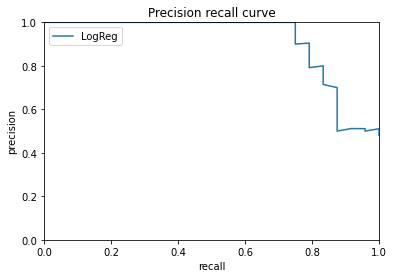

In [16]:
# plot the precision and recall for each threshold value
fix, ax = plt.subplots()

ax.plot(recalls, precisions, label='LogReg')
ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('Precision recall curve')
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.legend()

(0.0, 1.0)

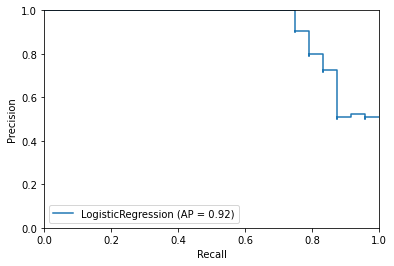

In [17]:
# compare result with built-in method
disp = metrics.plot_precision_recall_curve(clf_plain, Xtest, ytest)
disp.ax_.set_ylim((0, 1))
disp.ax_.set_xlim((0, 1))